In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import imageio
import cv2
import os
from pathlib import Path

In [8]:
train_df = pd.read_csv(os.path.join(os.getcwd() ,"data", "train.csv"))
test_df = pd.read_csv(os.path.join(os.getcwd() ,"data", "test.csv"))

print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")

train_df.sample(10)

Total videos for training: 594
Total videos for testing: 224


,video_name,tag
139,v_PlayingCello_g11_c02.avi,PlayingCello
336,v_Punch_g22_c06.avi,Punch
99,v_CricketShot_g23_c01.avi,CricketShot
461,v_ShavingBeard_g23_c05.avi,ShavingBeard
366,v_ShavingBeard_g09_c01.avi,ShavingBeard
176,v_PlayingCello_g16_c07.avi,PlayingCello
462,v_ShavingBeard_g23_c06.avi,ShavingBeard
12,v_CricketShot_g09_c06.avi,CricketShot
558,v_TennisSwing_g20_c01.avi,TennisSwing
25,v_CricketShot_g11_c05.avi,CricketShot


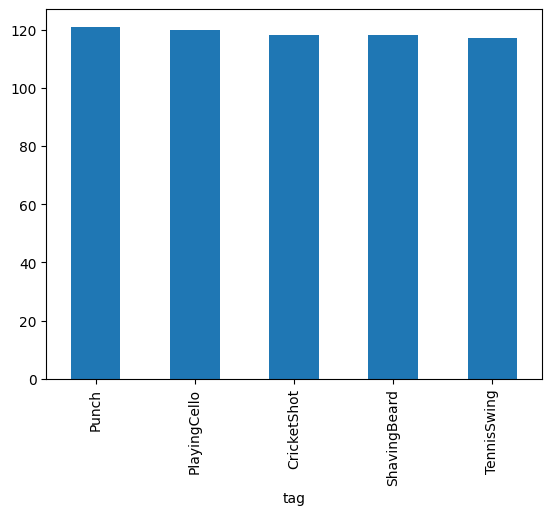

In [10]:
# plt the label histogram from the training data
train_df['tag'].value_counts().plot(kind='bar')
plt.show()

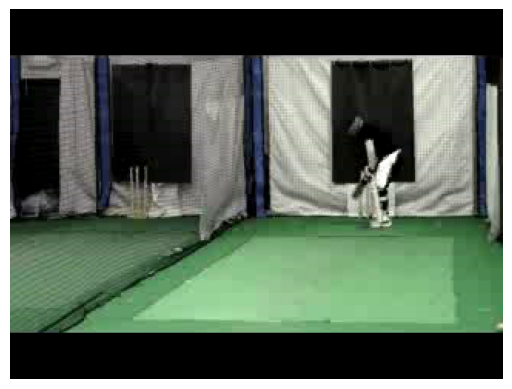

In [11]:
# load a video and display the first frame
video_path = os.path.join(os.getcwd() ,"data", "train", train_df['video_name'].values[0])
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

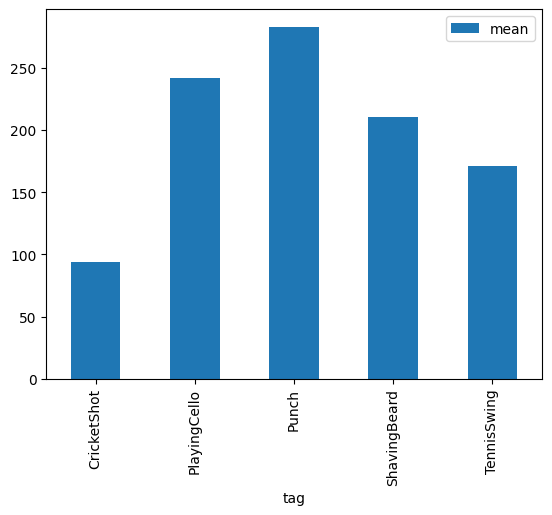

,mean,max,min
tag,,,
CricketShot,93.754237,262,46
PlayingCello,241.600000,388,105
Punch,283.132231,300,68
ShavingBeard,210.737288,336,90
TennisSwing,171.213675,368,69


In [18]:
# for each video in the directory, extract the number of frames it's composed of, and add it to the dataframe
def count_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    return total_frames

train_df['n_frames'] = train_df['video_name'].map(lambda x: count_frames(os.path.join(os.getcwd() ,"data", "train", x)))
test_df['n_frames'] = test_df['video_name'].map(lambda x: count_frames(os.path.join(os.getcwd() ,"data", "test", x)))

#plot the histogram of the number of frames, add the max number of frames per category and the min for each category
train_df.groupby('tag')['n_frames'].agg(['mean']).plot(kind='bar')
plt.show()

train_df.groupby('tag')['n_frames'].agg(['mean', 'max', 'min'])


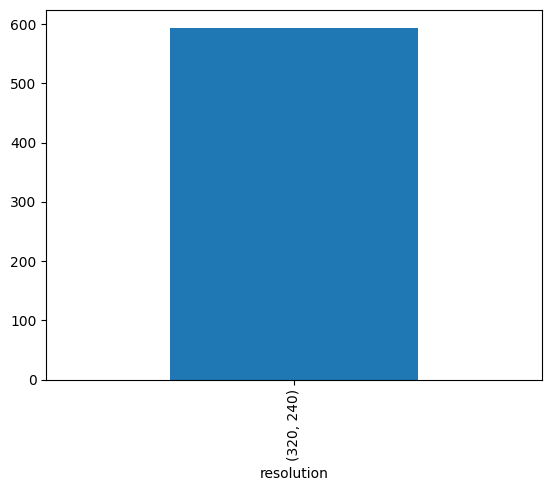

In [19]:
def get_resolution(video_path):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return width, height

train_df['resolution'] = train_df['video_name'].map(lambda x: get_resolution(os.path.join(os.getcwd() ,"data", "train", x)))
train_df['resolution'] = train_df['resolution'].map(lambda x: str(x))

train_df['resolution'].value_counts().plot(kind='bar')
plt.show()
